In [3]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container

Num_Points = 25


In [9]:
# Load Testset model

Testset_Data = BB_Model('Regression')

#Testset_Data.df().head()

['Passive_0', 'Passive_1', 'Active_9', 'Active_7', 'Passive_2', 'Active_8', 'Active_5', 'Passive_3', 'Active_6', 'Passive_4']
[0 1 4 7 9 6 8 3 5 2]
[ 0.          0.         98.24105998 81.20376421  0.         87.38679728
 22.48148073  0.         62.92742092  0.        ]


In [10]:
Testset_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4789253531379216


MLPRegressor(random_state=RandomState(MT19937) at 0x20F893D9840)

In [11]:
Testset_Data.Random_Forest()

0.8477409061290246


RandomForestRegressor(random_state=RandomState(MT19937) at 0x20F893D9840)

In [12]:
Testset_Data.L_Regression()

0.9999539290975115


LinearRegression()

In [13]:
print(Testset_Data.get_features())

['Passive_0', 'Passive_1', 'Active_9', 'Active_7', 'Passive_2', 'Active_8', 'Active_5', 'Passive_3', 'Active_6', 'Passive_4']


In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

X_train, X_test, y_train, y_test = Testset_Data.get_TT_data()

RBF_kernel = RBF()
Matern_kernel = Matern()

GP = GaussianProcessRegressor(kernel=Matern_kernel, n_restarts_optimizer = 5, normalize_y = False)

GP.fit(X_train, y_train)

score = GP.score(X_test, y_test)

print(score)

0.978765554005319


In [15]:
Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):
    
    X_row = np.array([X_test[test_instance]])

    y_predict, y_std = GP.predict(X_row, return_std=True)
    
    print(y_test[test_instance], ' : ', y_predict, ' : ', y_std, ' : ', abs(y_test[test_instance] - y_predict)/y_std)


-8.554696378655247  :  [-7.62565854]  :  [0.3040704]  :  [3.05533798]
16.77885976576835  :  [27.11963177]  :  [0.28903338]  :  [35.77708564]
119.01085818448513  :  [128.27573682]  :  [0.29620908]  :  [31.27817248]
352.9952230300218  :  [293.85487559]  :  [0.52847366]  :  [111.90784415]
80.86733502302873  :  [73.96021292]  :  [0.40211237]  :  [17.17709438]
-70.82607377100258  :  [-75.33761087]  :  [0.31584991]  :  [14.2838005]
-8.409009931293351  :  [2.83002555]  :  [0.47701462]  :  [23.56119687]
47.24355732957767  :  [43.20644416]  :  [0.42694238]  :  [9.45587354]
231.9556378181062  :  [213.83923923]  :  [0.33140558]  :  [54.66534024]
256.68805964573306  :  [246.02190826]  :  [0.35051657]  :  [30.42980663]
343.32850950898813  :  [304.96510215]  :  [0.42731567]  :  [89.77767501]
87.04060178628652  :  [54.08255065]  :  [0.64388668]  :  [51.18610486]
-201.79360288112176  :  [-205.62478543]  :  [0.34788011]  :  [11.01293919]
37.107753770721374  :  [30.44392811]  :  [0.33281623]  :  [20.022

In [16]:
GP.L_

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57517087,  0.8180333 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44264298,  0.2029945 ,  0.87341881, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.50920178,  0.07324675,  0.06254011, ...,  0.37961873,
         0.        ,  0.        ],
       [ 0.38097456,  0.22106425,  0.17627573, ...,  0.00199828,
         0.35415118,  0.        ],
       [ 0.60416718, -0.05761899,  0.02199631, ...,  0.00710474,
        -0.00182307,  0.49182531]])

In [17]:
from sklearn.inspection import permutation_importance

In [18]:
results = permutation_importance(GP, X_test, y_test, scoring='neg_mean_squared_error')

In [19]:
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -20.31925
Feature: 1, Score: -16.37805
Feature: 2, Score: 14151.87363
Feature: 3, Score: 12364.99724
Feature: 4, Score: -108.60214
Feature: 5, Score: 12759.13954
Feature: 6, Score: 1009.58587
Feature: 7, Score: 42.09022
Feature: 8, Score: 8600.72321
Feature: 9, Score: 16.01818


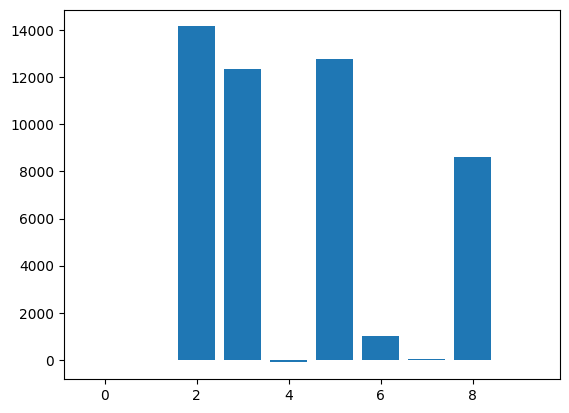

In [21]:
from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
print(results)

{'importances_mean': array([ 5.5039513 ,  2.00493513,  8.24964958,  9.74524142, 23.70399434,
       -1.12154317, -0.21647821,  1.39438391, -1.14923632,  1.0618364 ]), 'importances_std': array([1.20722066, 1.19787303, 3.99612592, 3.39725769, 6.86786694,
       0.94420208, 0.75069998, 0.64921605, 0.9027294 , 0.66236071]), 'importances': array([[ 5.74703724,  4.27061648,  7.57683296,  4.32083361,  5.60443619],
       [ 3.87867215,  0.65875059,  2.84709876,  1.63952592,  1.00062826],
       [ 3.77362357, 13.30971884,  9.23693585,  3.46418923, 11.46378042],
       [10.3538145 ,  5.16759706,  6.55206619, 13.84422295, 12.80850638],
       [12.3941169 , 31.80889565, 19.8902152 , 28.45007214, 25.97667178],
       [-1.64433591,  0.51382805, -1.05846442, -2.34764003, -1.07110355],
       [-0.20843291,  0.1221786 , -1.39968067, -0.48857746,  0.89212138],
       [ 1.79896371,  0.75170273,  0.47073839,  2.01223378,  1.93828093],
       [-2.36917232,  0.34828677, -1.506641  , -0.78309208, -1.43556294

In [16]:
x=[4,1,7,9,-2]
coeffs=np.argsort(x)
print(coeffs)

[4 1 0 2 3]


In [6]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Testset_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Testset_Data.get_L_Regression(),
                                      train_data           = X_train,
                                      categorical_features = Testset_Data.get_catagorical(),
                                      mode                 = Testset_Data.get_mode())       


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [8]:
# Generate explantion data for Random Forest

Testset_Stats = Feature_Statistics(feature_names = Testset_Data.get_features(), mode = Testset_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    explain_inst = Unravel_Exp.explain(X_init            = data_row,
                                       feature_names     = Testset_Data.get_features(),
                                       alpha             = "FUR",
                                       max_iter          = 20,
                                       normalize         = False,
                                       importance_method = "ARD")
       
    f_predict = Testset_Data.get_L_Regression().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.gpmodel_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    

    Testset_Stats.Add_Sample(sample       = data_row,
                             outcome      = y_test[test_instance],
                             f_prediction = f_predict,
                             e_prediction = e_predict)
    

INSTANCE:  0
INSTANCE:  1


In [9]:
Testset_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

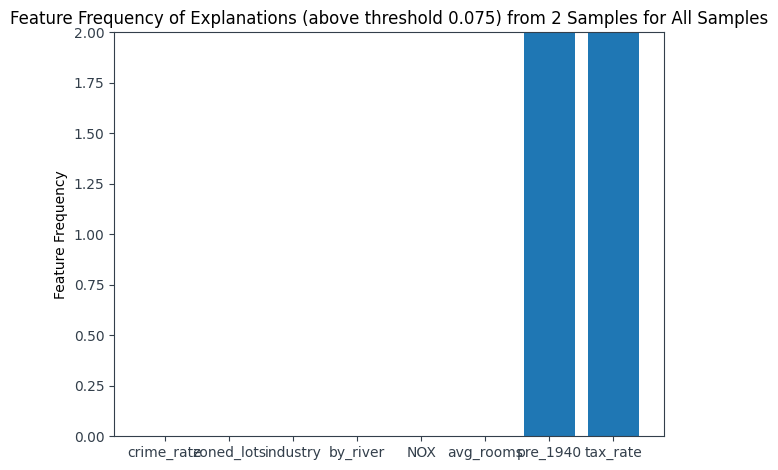

In [10]:
Testset_Stats.Frequency_Plot()

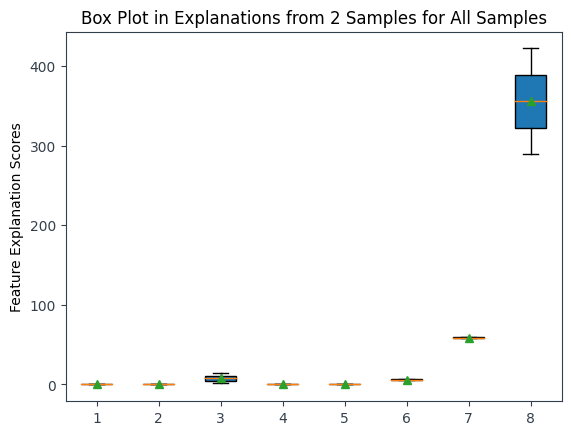

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      tax_rate


In [11]:
Testset_Stats.Box_Plot()

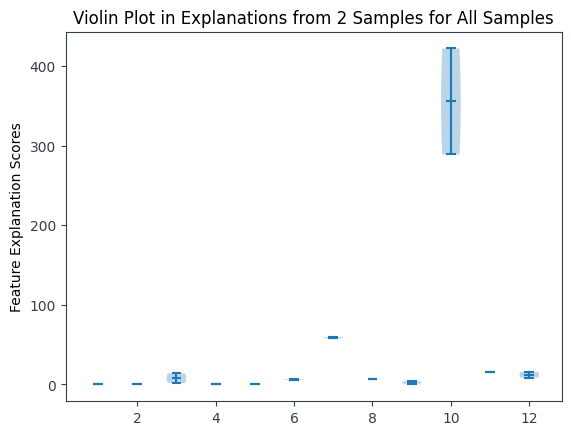

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      emp_distance
9 -      rad_access
10 -     tax_rate
11 -     pupil_tea_rat
12 -     low_status


In [12]:
Testset_Stats.Violin_Plot(top_features=False)

In [13]:
Testset_Container = Regression_Container(Testset_Stats, 5)

Testset_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


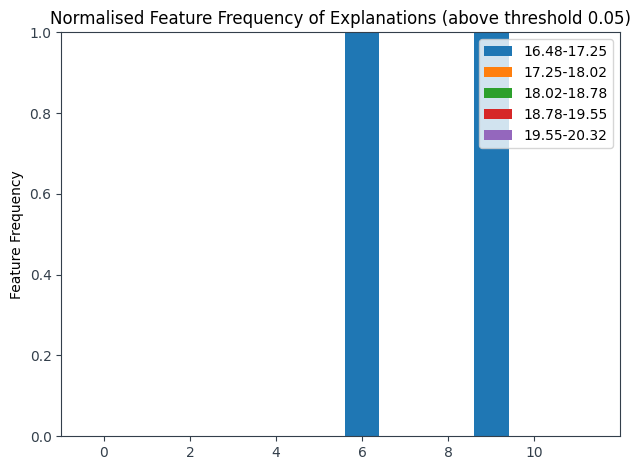

0 -      crime_rate
1 -      zoned_lots
2 -      industry
3 -      by_river
4 -      NOX
5 -      avg_rooms
6 -      pre_1940
7 -      emp_distance
8 -      rad_access
9 -     tax_rate
10 -     pupil_tea_rat
11 -     low_status


In [14]:
Testset_Container.Frequency_Plot()

In [15]:
Testset_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           4.3664999999999985  :  13.715912249999935  :  8.06999999999999
y - exp(x):          18.134605116189803  :  1.0500539833879807  :  19.159326533643338
BB(x) - exp(x):      22.5011051161898  :  7.175854694309604  :  25.17988369873626
Average exp(x) var:  0.02739518464404843


In [16]:
Testset_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.6666666666666666
Mean Jaccard Distance:    0.33333333333333337


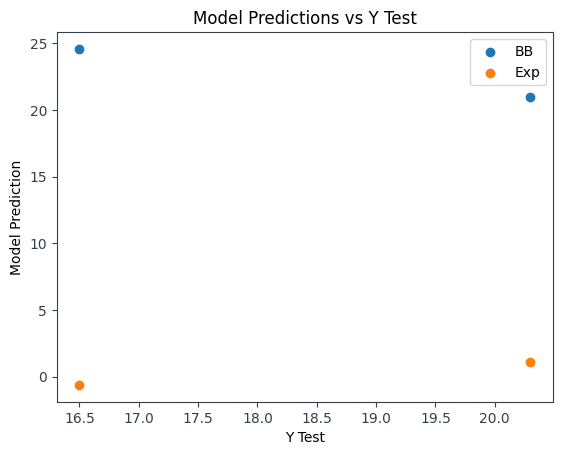

In [17]:
Testset_Stats.Reg_Fidelity_Graph()